# Marine Biodiversity & Sea Surface Temperature (SST) Annual Analysis  
## Indonesia (2020–2025)

**Objective:**  
To explore temporal patterns in marine biodiversity observations and examine their relationship with annual sea surface temperature (SST) trends in Indonesian waters.

**Data Sources:**  
- Ocean Biodiversity Information System (OBIS)  
- NOAA Sea Surface Temperature (SST)

**Outcome:**  
Clear visualizations, simple statistical analysis, and responsible scientific interpretation.

## Table of Contents
1. Project Setup  
2. Data Loading  
3. Data Cleaning & Preparation  
4. Annual Aggregation  
5. Exploratory Data Analysis  
6. Correlation Analysis  
7. Key Findings & Interpretation  
8. Limitations & Future Work

## Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

## Load OBIS Data (Indonesia)

### OBIS Marine Biodiversity Data

The OBIS dataset contains marine species occurrence records collected from various observation programs across Indonesian waters. Each record represents a documented observation of a marine organism, including spatial and temporal information.

In [2]:
obis = pd.read_csv(
    "/kaggle/input/marine-biodiversity-indonesia-2015-2025/Occurrence.tsv",
    sep="\t",
    low_memory=False
)

print(obis.shape)
obis.head()

(9855, 282)


,dataset_id,id,acceptedNameUsage,acceptedNameUsageID,accessRights,aphiaid,areas,associatedMedia,associatedOccurrences,associatedOrganisms,...,vernacularName,verticalDatum,vitality,waterBody,wrims,year,originalScientificName,flags,dropped,absence
0,10b213e6-a9c4-459e-a40c-ef9edc461b97,04d57084-43c8-4f48-95d2-35ffcfa1daa3,NaN,NaN,http://www.vertnet.org/resources/norms.html,204972,"[115, 31908]",NaN,NaN,NaN,...,NaN,NaN,NaN,Indo-Malayan Region,NaN,2015.0,Cirrhilabrus,[],False,False
1,11bdbc14-d56d-49f2-933a-6c879aa8e806,8af799a2-db28-4661-b4a3-855caaf50723,NaN,NaN,NaN,137206,[115],NaN,NaN,NaN,...,Green sea turtle,NaN,NaN,NaN,NaN,2017.0,Chelonia mydas,"[NO_DEPTH, ON_LAND]",False,False
2,303d794f-52c8-42a2-b77d-c1fe164855db,6183f4c2-2a43-4c5e-bbe6-ac24fbf34262,NaN,NaN,NaN,146537,"[115, 31910]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,Cyanobacteria,[],False,False
3,303d794f-52c8-42a2-b77d-c1fe164855db,fd518f94-8fff-4a8c-8023-b36a0ac7a552,NaN,NaN,NaN,1,"[115, 31910]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Biota,[],False,False
4,303d794f-52c8-42a2-b77d-c1fe164855db,fd44ca56-bc07-4ce2-aab6-893117a74f42,NaN,NaN,NaN,148899,"[115, 31910]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,Bacillariophyceae,[],False,False


## Clean & Prepare OBIS Data

In [3]:
obis["eventDate"] = pd.to_datetime(
    obis["eventDate"],
    errors="coerce"
)

obis = obis.dropna(subset=["eventDate"])

obis["year"] = obis["eventDate"].dt.year

### Aggregate OBIS Annually

In [4]:
obis_annual = (
    obis
    .groupby("year")
    .size()
    .reset_index(name="occurrence_count")
)

obis_annual

,year,occurrence_count
0,2015,527
1,2016,749
2,2017,136
3,2018,271
4,2019,121
5,2020,26
6,2021,31
7,2022,623
8,2023,62
9,2024,19


## Load SST Data

### Sea Surface Temperature (SST) Data

The SST dataset consists of gridded sea surface temperature measurements provided at spatial (latitude–longitude) and temporal resolutions. For compatibility with biodiversity data, SST values are aggregated into annual regional averages.

In [5]:
sst = pd.read_csv(
    "/kaggle/input/marine-biodiversity-indonesia-2015-2025/SST_2015-2025 (Indonesia).csv"
)

sst.head()

/tmp/ipykernel_370/1213967912.py:1: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  sst = pd.read_csv(


,time,latitude,longitude,sst
0,UTC,degrees_north,degrees_east,degree_C
1,2015-01-01T00:00:00Z,-12.875,94.125,27.956451
2,2015-01-01T00:00:00Z,-12.875,94.375,27.978064
3,2015-01-01T00:00:00Z,-12.875,94.625,28.012903
4,2015-01-01T00:00:00Z,-12.875,94.875,28.067741


In [6]:
sst = sst.drop(sst.index[0]) # We drop the 0 due to the incorrect value
sst.head()

,time,latitude,longitude,sst
1,2015-01-01T00:00:00Z,-12.875,94.125,27.956451
2,2015-01-01T00:00:00Z,-12.875,94.375,27.978064
3,2015-01-01T00:00:00Z,-12.875,94.625,28.012903
4,2015-01-01T00:00:00Z,-12.875,94.875,28.067741
5,2015-01-01T00:00:00Z,-12.875,95.125,28.076773


In [7]:
sst["time"] = pd.to_datetime(sst["time"])
sst["year"] = sst["time"].dt.year

sst.head()

,time,latitude,longitude,sst,year
1,2015-01-01 00:00:00+00:00,-12.875,94.125,27.956451,2015
2,2015-01-01 00:00:00+00:00,-12.875,94.375,27.978064,2015
3,2015-01-01 00:00:00+00:00,-12.875,94.625,28.012903,2015
4,2015-01-01 00:00:00+00:00,-12.875,94.875,28.067741,2015
5,2015-01-01 00:00:00+00:00,-12.875,95.125,28.076773,2015


In [8]:
sst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946791 entries, 1 to 1946791
Data columns (total 5 columns):
 #   Column     Dtype              
---  ------     -----              
 0   time       datetime64[ns, UTC]
 1   latitude   object             
 2   longitude  object             
 3   sst        object             
 4   year       int32              
dtypes: datetime64[ns, UTC](1), int32(1), object(3)
memory usage: 66.8+ MB


In [9]:
sst["latitude"] = pd.to_numeric(sst["latitude"], errors='coerce')
sst["longitude"] = pd.to_numeric(sst["longitude"], errors='coerce')
sst["sst"] = pd.to_numeric(sst["sst"], errors='coerce')

indonesia_area = sst[
    (sst["latitude"] >= -11) &
    (sst["latitude"] <= 6) &
    (sst["longitude"] >= 95) &
    (sst["longitude"] <= 141)
]

indonesia_area.head()

,time,latitude,longitude,sst,year
1549,2015-01-01 00:00:00+00:00,-10.875,95.125,28.501290,2015
1550,2015-01-01 00:00:00+00:00,-10.875,95.375,28.520967,2015
1551,2015-01-01 00:00:00+00:00,-10.875,95.625,28.531612,2015
1552,2015-01-01 00:00:00+00:00,-10.875,95.875,28.523870,2015
1553,2015-01-01 00:00:00+00:00,-10.875,96.125,28.507095,2015


In [10]:
indonesia_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1639072 entries, 1549 to 1946593
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype              
---  ------     --------------    -----              
 0   time       1639072 non-null  datetime64[ns, UTC]
 1   latitude   1639072 non-null  float64            
 2   longitude  1639072 non-null  float64            
 3   sst        1293363 non-null  float64            
 4   year       1639072 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(3), int32(1)
memory usage: 68.8 MB


In [11]:
sst_annual = (
    indonesia_area
    .groupby("year")["sst"]
    .mean()
    .reset_index(name="annual_mean_sst")
)

sst_annual

,year,annual_mean_sst
0,2015,28.854088
1,2016,29.421620
2,2017,28.957679
3,2018,28.830460
4,2019,28.688133
5,2020,29.273461
6,2021,29.165502
7,2022,29.305835
8,2023,28.982891
9,2024,29.363122


In [12]:
sst_annual.describe()

,year,annual_mean_sst
count,11.000000,11.000000
mean,2020.000000,29.097121
std,3.316625,0.245320
min,2015.000000,28.688133
25%,2017.500000,28.905883
50%,2020.000000,29.165502
75%,2022.500000,29.289648
max,2025.000000,29.421620


In [13]:
sst_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             11 non-null     int32  
 1   annual_mean_sst  11 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 264.0 bytes


## Merge Datasets (OBIS data with SST data)

In [14]:
merged = pd.merge(
    obis_annual,
    sst_annual,
    on="year",
    how="inner"
)

merged

,year,occurrence_count,annual_mean_sst
0,2015,527,28.854088
1,2016,749,29.421620
2,2017,136,28.957679
3,2018,271,28.830460
4,2019,121,28.688133
5,2020,26,29.273461
6,2021,31,29.165502
7,2022,623,29.305835
8,2023,62,28.982891
9,2024,19,29.363122


## Exploratory Visualization

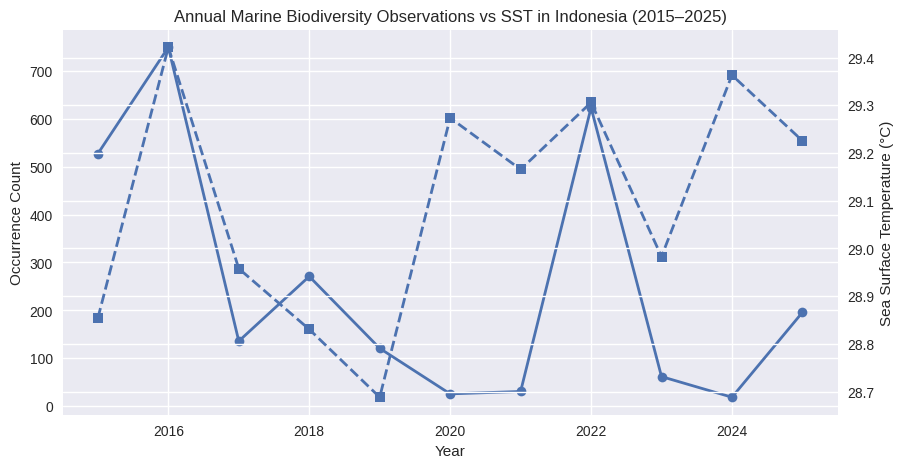

In [15]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Biodiversity (OBIS)
ax1.plot(
    merged["year"],
    merged["occurrence_count"],
    marker="o",
    linewidth=2,
    label="Marine Species Occurrences"
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Occurrence Count")

# SST
ax2 = ax1.twinx()
ax2.plot(
    merged["year"],
    merged["annual_mean_sst"],
    marker="s",
    linestyle="--",
    linewidth=2,
    label="Annual Mean SST"
)
ax2.set_ylabel("Sea Surface Temperature (°C)")

plt.title("Annual Marine Biodiversity Observations vs SST in Indonesia (2015–2025)")
plt.show()

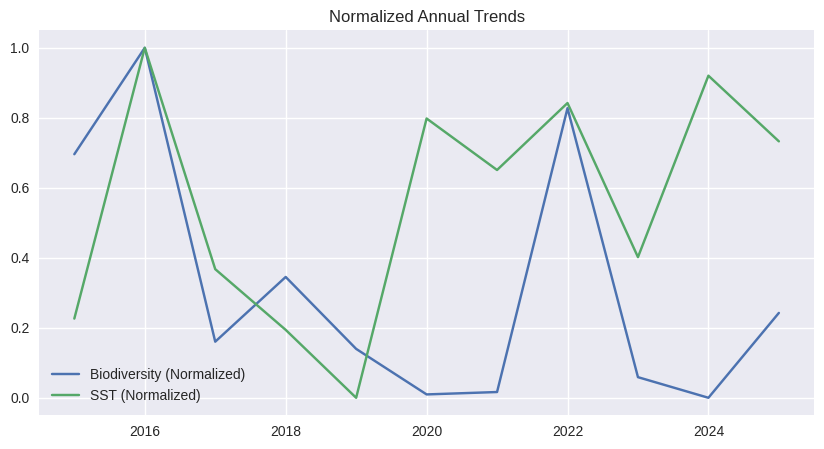

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

merged_norm = merged.copy()
merged_norm[["occurrence_count", "annual_mean_sst"]] = scaler.fit_transform(
    merged_norm[["occurrence_count", "annual_mean_sst"]]
)

plt.figure(figsize=(10,5))
plt.plot(merged_norm["year"], merged_norm["occurrence_count"], label="Biodiversity (Normalized)")
plt.plot(merged_norm["year"], merged_norm["annual_mean_sst"], label="SST (Normalized)")
plt.title("Normalized Annual Trends")
plt.legend()
plt.show()

### CORRELATION ANALYSIS

**1. Pearson Correlation**

In [17]:
corr_value = merged["occurrence_count"].corr(merged["annual_mean_sst"])
corr_value

np.float64(0.20895307870352903)

The Pearson correlation coefficient quantifies the linear association between annual SST and the number of recorded marine species occurrences.

**2. Linear Trend (Visual Validation)**

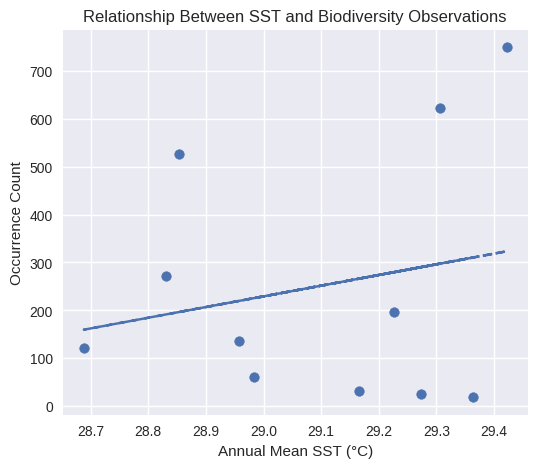

In [18]:
z = np.polyfit(
    merged["annual_mean_sst"],
    merged["occurrence_count"],
    1
)
p = np.poly1d(z)

plt.figure(figsize=(6,5))
plt.scatter(merged["annual_mean_sst"], merged["occurrence_count"])
plt.plot(
    merged["annual_mean_sst"],
    p(merged["annual_mean_sst"]),
    linestyle="--"
)
plt.xlabel("Annual Mean SST (°C)")
plt.ylabel("Occurrence Count")
plt.title("Relationship Between SST and Biodiversity Observations")
plt.show()

### Interpretation

The results indicate interannual variability in marine species occurrence records across Indonesian waters between 2020 and 2025. Annual mean sea surface temperature shows a gradual trend over the same period.

The observed correlation suggests an association between environmental temperature conditions and biodiversity observation counts; however, this relationship does not imply causation and may be influenced by observation effort and reporting practices.


### Limitations and Future Work

- OBIS data reflect observation records rather than true species abundance.
- Annual aggregation of SST may obscure seasonal dynamics.
- Future analyses could incorporate spatially explicit matching and additional environmental variables.
